### Ran at following tags
MagD https://github.com/pnsn/magD/tree/v2.1

magd_client https://github.com/pnsn/magd_client/tree/v2.1

# Noise Study to compare current and notional EEW station geometry

In [1]:
from magD.magD import MagD
from magD.pickle import get_pickle
import os

# some constants for all plots

# path to local libraries
magd_client_path = '/Users/joncon/Sites/magd_client/'
pickle_path = magd_client_path + "/pickle_jar"
os.chdir(magd_client_path)
print('Working in ' + os.getcwd())

# params for all profiles
lat_min = 38.0
lat_max = 52.0
lon_min = -130.0
lon_max = -115.0
resolution = 0.1
num_solutions = 4
nyquist_correction = 0.4
mu = 3e11
qconst = 300.0
beta = 3.5

# create all data sources icons can be changed without rebuilding magD object
data_srcs = {'existing_bb':
             {
                 'csv_path': 'csv/2019_eew/existing_bb.csv',
                 'starttime': '2019-01-01',
                 'endtime': '2019-03-31',
                 'color': 'Yellow',
                 'symbol': '^',
                 'size': 50,
                 'label': "Existing BB",
                 'unit': 'Mw',
                 'klass': 'scnl'
             },
             'existing_sm':
             {
                 'csv_path': 'csv/2019_eew/existing_sm.csv',
                 'starttime': '2019-01-01',
                 'endtime': '2019-03-31',
                 'color': 'blue',
                 'symbol': 'o',
                 'size': 50,
                 'unit': 'Mw',
                 'label': "Existing SM",
                 'klass': 'scnl'
             },
             'current':
             {
                 'csv_path': 'csv/2019_eew/current.csv',
                 'starttime': '2019-01-01',
                 'endtime': '2019-03-31',
                 'color': 'yellow',
                 'symbol': '^',
                 'size': 50,
                 'unit': 'Mw',
                 'label': "Existing",
                 'klass': 'scnl'
             }
             }


def make_grid(grid_type, src, lat_min=lat_min, lat_max=lat_max, lon_min=lon_min, lon_max=lon_max):
    grid = MagD(grid_type, name, resolution, lat_min, lat_max, lon_min, lon_max, 
                num_solutions, pickle_path, nyquist_correction, mu, qconst, beta)
    grid.build_markers(src)
    grid.build_origins()
    grid.build_matrix()
    grid.save()
    return grid


Working in /Users/joncon/Sites/magd_client


In [2]:
# only run once
# set book to autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Station data

### Existing EEW contributing stations

ShakeAlert Coordinator provided two xls files, one current west coast eew, one notional west coast eew. Both files were edited in Numbers, where the SM and BB channels we're filtered to unique files:

* ./csv/2019_eew/existing_bb.csv 
* ./csv/2019_eew/existing_sm.csv
* ./csv/2019_eew/notional_bb.csv
* ./csv/2019_eew/notional_sm.csv

Headers were changed as needed:
* sta
* chan
* net
* location
* lat
* lon
* rate

## Create and save MagD

In [11]:
name = "2019_eew_existing_all"
grid_type = 'detection'

src = {}
#combine both bb and sm
src['current'] = data_srcs['current']
%time grid_eew_existing_all = make_grid(grid_type, src)
print(grid_eew_existing_all.get_path())

JRO:BHZ:--:CC startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
COR:BHZ:0:IU startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
BMO:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
HAWA:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
NEW:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
NLWA:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
WVOR:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
LON:BHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
JESE:HHZ:--:UO startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
MRBL:HHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
PASS:HHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
TREE:HHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
JESE:ENZ:--:UO startime: 2019-01-01, endtime 2019-03-31 returne

## Detection Maps

### Instantiate MagD objects
If needed, instantiate runs from above. This is useful when kernel has been restarted or mapping is done at a later time. Paths come from stdout from above runs. Ensure this path is updated if MagD is reran at different resolution.

In [12]:
%time grid_eew_existing_all = get_pickle( \
    "/Users/joncon/Sites/magd_client//pickle_jar/2019_eew_existing_all/detection_grid/140x150-res-0.1.pickle")

CPU times: user 675 ms, sys: 8.44 ms, total: 684 ms
Wall time: 683 ms


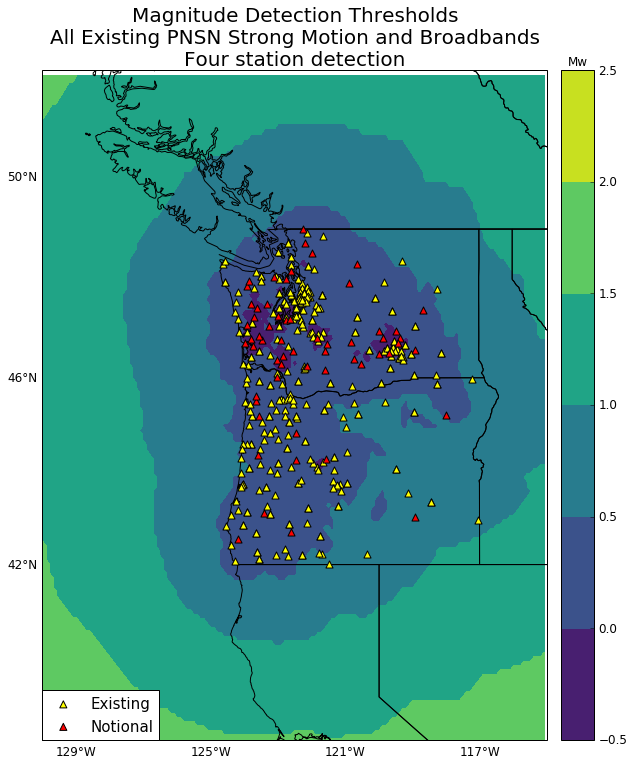

CPU times: user 1.58 s, sys: 145 ms, total: 1.72 s
Wall time: 1.08 s


In [11]:
path = grid_eew_existing_all.get_path()

%time %run -i scripts/plot_heatmap.py \
--path=$path \
--title1='Magnitude Detection Thresholds' \
--title2='All Existing PNSN Strong Motion and Broadbands' \
--title3='Four station detection' \
--plotstas=True \
--color=viridis \
--lat_min=38.0 \
--lat_max=52.0 \
--lon_min=-130.0 \
--lon_max=-115.0 \
--plotwidth=12 \
--plotheight=12 \
--legend_pad=0.0 \
--colorbar_pad=0.02 \
--levels=-0.5,0,0.5,1,1.5,2,2.5

# Find a good station 
Look for station used in highest number of solutions for a proxy for future stations

In [10]:
scnls = grid_eew_existing_all.productive_scnls()
length = len(scnls)
percentile95 =round((length - length*.95))

contribs = [s.contrib_solutions for s in scnls]
print(contribs.index(2))
stas = [s.sta for s in scnls]
template = scnls[percentile95]
#50th percentile channel by number of contributing solutions


# make a sample csv line 
i = percentile95
print("95th percentile:")
print(template.sta + "," + template.chan +
      "," + template.net + "," + template.loc + "," +
      str(scnls[i].lat) + "," + str(scnls[i].lon) +
      "," + str(scnls[i].samprate))
i = 130
bad = scnls[i]
print("Median:")
print(bad.sta + "," + bad.chan +
      "," + bad.net + "," + bad.loc + "," +
      str(scnls[i].lat) + "," + str(scnls[i].lon) +
      "," + str(scnls[i].samprate))

153
95th percentile:
OD2,HHZ,UW,—,47.38754,-118.71077,200
Median:
LUMI,HHZ,UW,--,48.72,-122.71,100


In [14]:
data_srcs['notional'] = {
    'csv_path': 'csv/2019_eew/notional.csv',
    'starttime': '2019-01-01',
    'endtime': '2019-03-31',
    'color': 'red',
    'symbol': '^',
    'size': 50,
    'label': 'Notional',
    'klass': 'scnl',
    'unit': 'Mw',
    'template_sta': template.sta,
    'template_chan': template.chan,
    'template_net': template.net,
    'template_loc': template.loc
}

In [15]:
# use the template pdf from above to as proxy for notional stations
name = "2019_eew_existing_and_notional"
grid_type = 'detection'

src = {}
src['current'] = data_srcs['current']
src['notional'] = data_srcs['notional']
%time grid_eew_existing_and_notional = make_grid(grid_type, src)
print(grid_eew_existing_and_notional.get_path())

JRO:BHZ:--:CC startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
COR:BHZ:0:IU startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
BMO:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
HAWA:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
NEW:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
NLWA:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
WVOR:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
LON:BHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
JESE:HHZ:--:UO startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
MRBL:HHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
PASS:HHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
TREE:HHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
JESE:ENZ:--:UO startime: 2019-01-01, endtime 2019-03-31 returne

In [13]:
%time grid_eew_existing_and_notional = get_pickle( \
    "/Users/joncon/Sites/magd_client//pickle_jar/2019_eew_existing_and_notional/detection_grid/140x150-res-0.1.pickle")

CPU times: user 526 ms, sys: 8.01 ms, total: 534 ms
Wall time: 534 ms


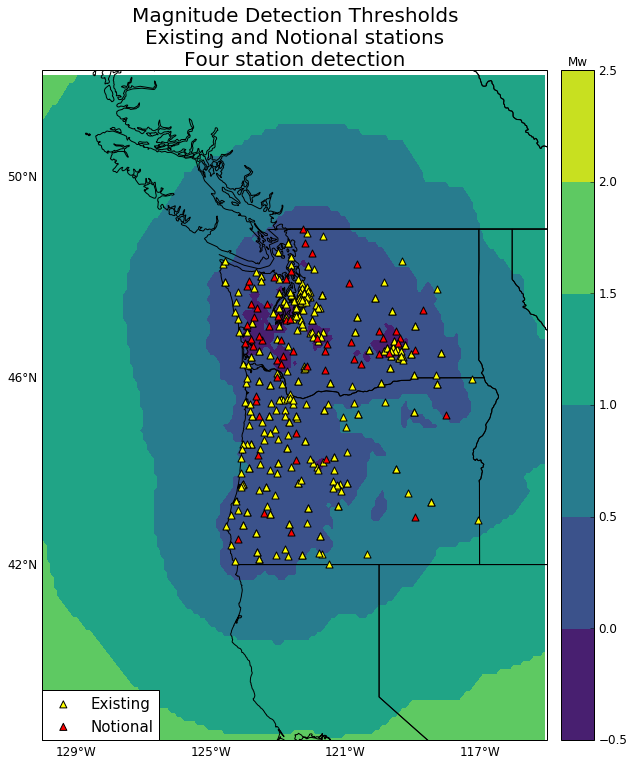

CPU times: user 1.91 s, sys: 185 ms, total: 2.09 s
Wall time: 1.48 s


In [16]:
path = grid_eew_existing_and_notional.get_path()

%time %run -i scripts/plot_heatmap.py \
--title1='Magnitude Detection Thresholds' \
--title2='Existing and Notional stations' \
--title3='Four station detection' \
--path=$path \
--plotstas=True \
--color=viridis \
--lat_min=38.0 \
--lat_max=52.0 \
--lon_min=-130.0 \
--lon_max=-115.0 \
--plotwidth=12 \
--plotheight=12 \
--legend_pad=0.0 \
--colorbar_pad=0.02 \
--levels=-0.5,0,0.5,1,1.5,2,2.5 \

In [17]:
%time grid_eew_existing_and_notional_diff = grid_eew_existing_and_notional.copy("diff_all_and_notional", "diff_all_and_notional")
%time grid_eew_existing_and_notional_diff.matrix = grid_eew_existing_all.matrix - grid_eew_existing_and_notional.matrix
%time grid_eew_existing_and_notional_diff.save()
print(grid_eew_existing_and_notional_diff.get_path())

CPU times: user 2.01 s, sys: 29.4 ms, total: 2.04 s
Wall time: 2.04 s
CPU times: user 207 µs, sys: 61 µs, total: 268 µs
Wall time: 219 µs
CPU times: user 278 ms, sys: 9.34 ms, total: 287 ms
Wall time: 292 ms
/Users/joncon/Sites/magd_client//pickle_jar/diff_all_and_notional/diff_all_and_notional_grid/140x150-res-0.1.pickle


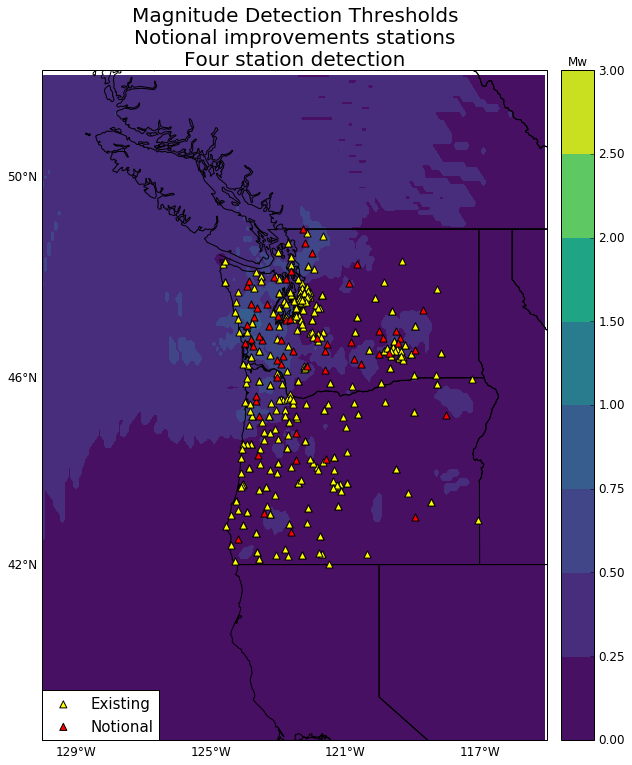

CPU times: user 1.89 s, sys: 171 ms, total: 2.06 s
Wall time: 1.42 s


In [18]:
# Perfomance 2 min 18 sec
path = grid_eew_existing_and_notional_diff.get_path()

%time %run -i scripts/plot_heatmap.py \
    --path=$path \
    --title1='Magnitude Detection Thresholds' \
    --title2='Notional improvements stations' \
    --title3='Four station detection' \
    --plotstas=True \
    --color=viridis \
    --lat_min=38.0 \
    --lat_max=52.0 \
    --lon_min=-130.0 \
    --lon_max=-115.0 \
    --plotwidth=12 \
    --plotheight=12 \
    --legend_pad=0.0 \
    --colorbar_pad=0.02 \
    --levels=0,0.25,0.5,0.75,1,1.5,2,2.5,3